# k-Means from Scratch

k-Means is clustering algorithm.

Pros: simple and fast, scales well, easy to implement

Cons: sensitive to initialization, assumes clusters are spherical and same size, requires choosing k in advance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

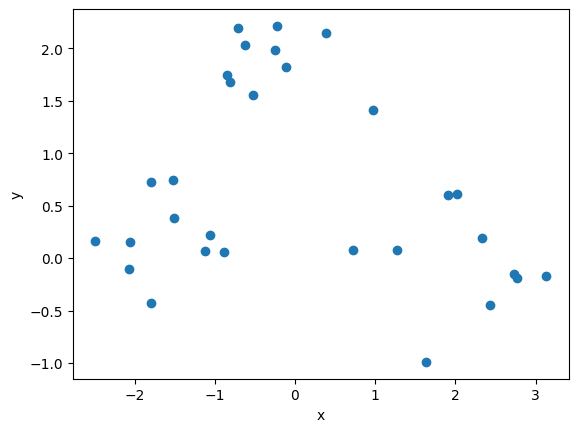

In [5]:
np.random.seed(0)

# Create data
# Cluster 1 centered at (-2, 0)
x1 = np.random.normal(-2, 0.5, 10)
y1 = np.random.normal(0, 0.5, 10)

# Cluster 2 centered at (2, 0)
x2 = np.random.normal(2, 0.5, 10)
y2 = np.random.normal(0, 0.5, 10)

# Cluster 3 centered at (0, 2)
x3 = np.random.normal(0, 0.5, 10)
y3 = np.random.normal(2, 0.5, 10)

x = np.hstack([x1, x2, x3])
y = np.hstack([y1, y2, y3])
data = np.vstack([x, y]).T

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Algorithm:

1) Choose k initial centroids.
These can be random data points or random positions in the feature space.

2) For each data point, compute its distance to all centroids (usually Euclidean distance).

3) Assign each point to the closest centroid.

4) For each cluster, recompute the centroid as the mean of all points assigned to that cluster.

5) Repeat steps 2–4 until a stopping criterion is met, such as:

    - centroids stop moving (convergence),

    - cluster assignments stop changing,

    - or you hit a maximum number of iterations.

In [6]:
def kmeans(data, k, max_iters=100):


    centroid = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Compute distances to centroids
        dists = np.zeros((data.shape[0], k))
        for i in range(k):
            dists[:, i] = np.linalg.norm(data - centroid[i], axis=1)

        # Assign clusters
        clusters = np.argmin(dists, axis=1)

        # Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

        # Stop if centroids don't move
        if np.all(centroid == new_centroids):
            break
        centroid = new_centroids


    return clusters, centroid

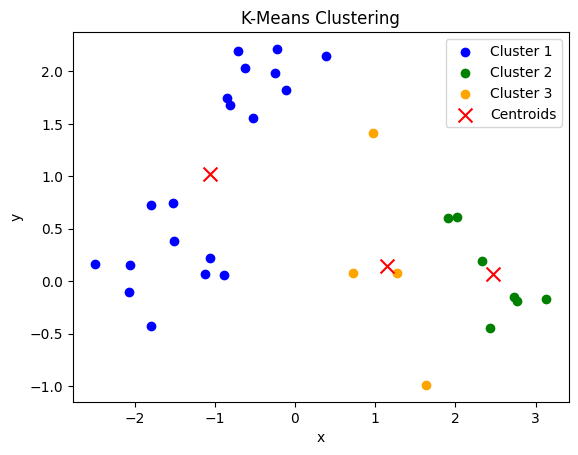

In [9]:
k = 3
clusters, centroid = kmeans(data, k=k)

# Define colors for clusters
colors = ['blue', 'green', 'orange']

# Plot points colored by cluster
for i in range(k):
    plt.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], 
                color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroid[:, 0], centroid[:, 1], color='red', marker='x', s=100, label='Centroids')

plt.title("K-Means Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

That kind of works but it didn't get the clusters right. So what went wrong?

k-Means is sensitive to initialization: the quality of the final clustering depends heavily on the initial positions of the centroids. A poor initialization can lead to suboptimal clusters. To mitigate this, we typically run k-Means multiple times with different random starts and keep the solution with the lowest sum of squared distances (SSD) between points and their assigned centroids.

In [ ]:
def kmeans_impoved(data, k, max_iters=100, n_init=5):
    best_score = np.inf
    best_clusters = None
    best_centroid = None

    for _ in range(n_init):
        centroid = data[np.random.choice(data.shape[0], k, replace=False)]

        for _ in range(max_iters):
            # Compute distances to centroids
            dists = np.zeros((data.shape[0], k))
            for i in range(k):
                dists[:, i] = np.linalg.norm(data - centroid[i], axis=1)

            # Assign clusters
            clusters = np.argmin(dists, axis=1)

            # Update centroids
            new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

            # Stop if centroids don't move
            if np.all(centroid == new_centroids):
                break
            centroid = new_centroids

        # Compute sum of squared distances for this run
        ssd = sum(np.linalg.norm(data[clusters == i] - centroid[i], axis=1).sum()**2 for i in range(k))
        
        # Keep the best clustering
        if ssd < best_score:
            best_score = ssd
            best_clusters = clusters
            best_centroid = centroid

    return best_clusters, best_centroid, best_score

[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[ 2.09495008 -0.03919972]
 [-0.27368677  1.87860371]
 [-1.63098841  0.20032301]]


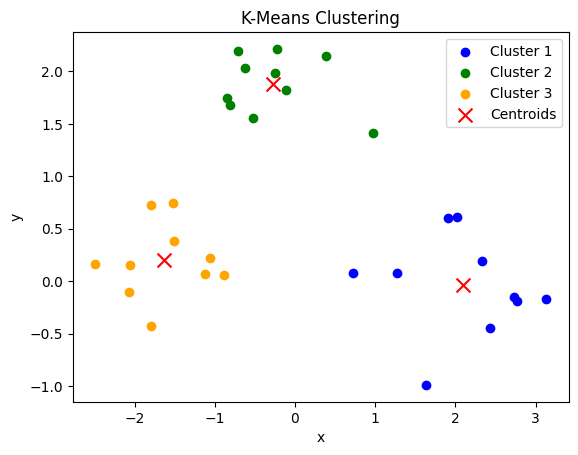

In [14]:
k = 3
clusters, centroid, _ = kmeans_impoved(data, k=k)
print(clusters)
print(centroid)

# Define colors for clusters
colors = ['blue', 'green', 'orange']

# Plot points colored by cluster
for i in range(k):
    plt.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], 
                color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroid[:, 0], centroid[:, 1], color='red', marker='x', s=100, label='Centroids')

plt.title("K-Means Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

This works better!

K-Means can be implemented with the sklearn library as follows:

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
clusters = kmeans.labels_
centroid = kmeans.cluster_centers_

print(clusters)
print(centroid)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]
[[ 2.09495008 -0.03919972]
 [-1.63098841  0.20032301]
 [-0.27368677  1.87860371]]
